In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D

# 1) 나눔 폰트 설치 (Colab 전용 명령)
!apt-get update -qq
!apt-get install -qq fonts-nanum*

# 2) 폰트 등록: 파일 경로와 폰트 이름 매핑
fe = fm.FontEntry(
    fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    name="NanumGothic"
)
fm.fontManager.ttflist.insert(0, fe)  # 폰트 목록 최상단에 삽입

# 3) Matplotlib 전역 설정
plt.rcParams.update({
    "font.size": 10,
    "font.family": "NanumGothic"
})
mpl.rcParams["axes.unicode_minus"] = False  # 음수 기호 깨짐 방지

# (선택) 정상 적용 확인
# from matplotlib.font_manager import FontProperties
# print("Resolved font path:", fm.findfont(FontProperties(family="NanumGothic")))

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

#### AI 헬스케어 첫번째 미니 프로젝트 “흡연 여부 데이터 분석을 통한 건강 인사이트 도출” 에 오신 여러분 환영합니다.
이번 프로젝트에서는 흡연여부를 판단하는 데이터를 가지고 시각화 및 가설을 판별해보려고 합니다.


A-Z로 진행되는 만큼 천천히 따라해보세요!

#### 팀 과제
- 데이터 구조, 분포 확인, 전처리 : 1.1_흡연여부데이터
- 데이터 간 관계 가설 수립 및 검증 : 1.2_데이터분석



### 흡연여부데이터 분석하기
최근 여러 기관에서는 흡연이 개인의 건강에 미치는 영향을 정확히 파악하고,
이를 기반으로 예방 중심의 건강관리 정책을 수립하려는 노력을 강화하고 있습니다.

하지만 “흡연 여부”를 직접 조사하는 것은 현실적으로 쉽지 않습니다.
이에 따라, 건강검진 데이터를 통해 흡연 여부를 데이터 기반으로 추정하고,
흡연자와 비흡연자 간의 생체·건강 지표 차이를 검증하려는 프로젝트가 시작되었습니다.

여러분은 이 프로젝트의 데이터 분석가이자 AI 엔지니어로 참여하게 되었습니다.
주어진 데이터에는 개인의 건강검진 결과(혈압, 혈당, 콜레스테롤, BMI 등)와
흡연 여부(label = 0 또는 1)가 포함되어 있습니다.

이제 여러분의 역할은 흡연 여부 데이터의 특성을 분석하고 시각화하며,
통계적 검정을 통해 변수 간 관계를 규명하는 것입니다.
시작해봅시다 !

#### 🎯 프로젝트 목표

	•	흡연자와 비흡연자 간의 건강 지표 차이 분석
	•	주요 변수들의 분포, 상관관계, 통계적 유의성 검증
	•	시각화를 통한 데이터 인사이트 도출
	•	추후 흡연 여부 예측 모델 개발을 위한 기초 분석 기반 마련




---



### 1. 가설 수립 (인당 최소 3개)

건강 지표별로 흡연자/비흡연자 간 통계적 차이 검증

(예시)
- H₀ (귀무가설): BMI- 흡연자와 비흡연자의 평균 BMI는 같다.
- H₁ (대립가설): BMI- 흡연자와 비흡연자의 평균 BMI는 다르다.

In [ ]:
### 아래에 3가지의 가설을 설정해보세요.
# 가설 1.
# 가설 2.
# 가설 3.
'''
귀무 가설 :
1) 흡연자와 비흡연자의 BMI 수치가 같다.
2) 흡연자와 비흡연자의 평균 콜레스테롤는 같다
3) 흡연자와 비흡연자들의 중성지방 수치가 같다
4) 흡연자와 비흡연자들의 LDL, HDL 수치가 같다
5) 흡연자와 비흡연자의 평균 공복 혈당 수치는 차이가 없다.


대립 가설 :
1) 흡연자와 비흡연자의 BMI 수치가 다르다
2) 흡연자와 비흡연자의 평균 콜레스테롤는 다르다
3) 흡연자와 비흡연자들의 중성지방 수치가 다르다
4) 흡연자와 비흡연자들의 LDL, HDL 수치가 다르다
5) 흡연자와 비흡연자의 평균 공복 혈당 수치는 차이가 있다.


가질만한 가설 :
1) 흡연자와 비흡연자의 BMI 수치가 다르다 (대립가설)
2) 흡연자와 비흡연자의 평균 콜레스테롤는 같다 (귀무가설)
3) 흡연자와 비흡연자들의 중성지방 수치가 다르다
4) 흡연자와 비흡연자들의 LDL, HDL 수치가 다르다
5) 흡연자와 비흡연자의 평균 공복 혈당 수치는 차이가 없다.
'''

In [1]:
#전처리 과정(결측치, 이상치)확인 및 제거
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

health_data = pd.read_csv("/content/smoking_health_data.csv")
display(health_data.describe())
display(health_data.info())
display(health_data.isnull().sum())

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,6860.000000,7000.000000,6860.000000,6860.000000,6860.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011414,0.227429,99.307289,45.555102,127.028134,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.430137,0.419202,21.190058,8.831564,73.219161,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,399.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7000 non-null   object 
 1   나이        7000 non-null   int64  
 2   키(cm)     7000 non-null   int64  
 3   몸무게(kg)   7000 non-null   int64  
 4   BMI       7000 non-null   float64
 5   시력        6860 non-null   float64
 6   충치        7000 non-null   int64  
 7   공복 혈당     6860 non-null   float64
 8   혈압        6860 non-null   float64
 9   중성 지방     6860 non-null   float64
 10  혈청 크레아티닌  7000 non-null   float64
 11  콜레스테롤     7000 non-null   int64  
 12  고밀도지단백    7000 non-null   int64  
 13  저밀도지단백    7000 non-null   int64  
 14  헤모글로빈     7000 non-null   float64
 15  요 단백      7000 non-null   int64  
 16  간 효소율     7000 non-null   float64
 17  label     7000 non-null   int64  
dtypes: float64(8), int64(9), object(1)
memory usage: 984.5+ KB


None

,0
ID,0
나이,0
키(cm),0
몸무게(kg),0
BMI,0
시력,140
충치,0
공복 혈당,140
혈압,140
중성 지방,140


In [2]:
health_data['Age_Class'] = pd.cut(
    health_data['나이'],
    bins=[0, 30, 50, 70, np.inf],
    labels=['30대 이하', '30~50대', '50~70대', '70대 이상']
)

health_data['BMI_Class'] = pd.cut(
    health_data['BMI'],
    bins=[0, 18.5, 25, 30, float('inf')],
    labels=['저체중', '정상', '과체중', '비만']
)

display(health_data)

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,Age_Class,BMI_Class
0,TRAIN_0000,35,170,70,24.22,1.10,1,98.0,40.0,80.0,1.3,211,75,120,15.9,1,1.53,1,30~50대,정상
1,TRAIN_0001,40,150,55,24.44,1.00,0,173.0,39.0,104.0,0.6,251,46,184,11.8,1,1.45,0,30~50대,정상
2,TRAIN_0002,60,170,50,17.30,0.75,0,96.0,40.0,61.0,0.8,144,43,89,15.3,1,1.04,0,50~70대,저체중
3,TRAIN_0003,40,150,45,20.00,0.50,0,92.0,40.0,46.0,0.7,178,66,110,13.4,1,1.18,0,30~50대,정상
4,TRAIN_0004,55,155,65,27.06,NaN,0,87.0,42.0,95.0,0.9,232,62,151,13.8,1,1.32,0,50~70대,과체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87.0,45.0,141.0,1.2,184,44,112,14.9,1,1.50,0,30대 이하,정상
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87.0,45.0,82.0,0.9,184,64,103,14.3,1,1.47,1,50~70대,정상
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97.0,44.0,87.0,0.9,178,54,107,15.6,1,1.00,0,30~50대,비만
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89.0,57.0,161.0,0.6,157,49,76,14.4,1,1.00,0,50~70대,정상


In [3]:
# 방금 위 코드로 결측치 확인 이번 코드로 제거
#  키, 몸무게에 0의 값이 존재 유무 확인 및 0의 값을 NaN으로 바꿈
health_data["키(cm)"] = health_data["키(cm)"].replace(0, np.nan)
health_data["몸무게(kg)"] = health_data["몸무게(kg)"].replace(0, np.nan)


# 5) 충치 (0/1 칼럼으로 정리)
health_data["충치"] = pd.to_numeric(health_data["충치"], errors="coerce").fillna(0)
health_data["충치"] = health_data["충치"].clip(0, 1).astype(int)


#  label 정제
health_data = health_data[health_data["label"].isin([0, 1])]
health_data["label"] = health_data["label"].astype(int)



# 방법 1) MI(MICE - Bayesian Ridge Regression) : 다중 대치법(의료논문에서 결측치 제거에 많이 사용)


# 0) 데이터 불러오기
df = health_data

# 숫자 / 문자 분리
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
object_cols = df.select_dtypes(include=['object']).columns

df_numeric = df[numeric_cols]
df_object = df[object_cols]

# -----------------------------
# 🔥 1) 스케일링 — Bayesian Ridge는 스케일 민감함
# -----------------------------
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(
    scaler.fit_transform(df_numeric),
    columns=numeric_cols
)

# -----------------------------
# 🔥 2) Bayesian Ridge Regression 기반 MICE
#     (비선형 데이터에서 안정성 ↑)
# -----------------------------
bayes_model = BayesianRidge(
    alpha_1=1e-5,    # Regularization prior (크면 가중치 작아져 overfit ↓)
    alpha_2=1e-5,
    lambda_1=1e-5,
    lambda_2=1e-5
)

imputer = IterativeImputer(
    estimator=bayes_model,
    max_iter=40,                 # 반복 횟수 증가 (20 → 40)
    sample_posterior=True,       # Bayesian posterior sampling → MI 효과 ↑
    n_nearest_features=10,       # 주변 10개 중요 feature만 사용
    imputation_order="ascending",
    random_state=42
)

# 대체 수행
imputed_scaled = imputer.fit_transform(numeric_scaled)

# 스케일 복원
df_imputed_numeric = pd.DataFrame(
    scaler.inverse_transform(imputed_scaled),
    columns=numeric_cols
)

# -----------------------------
# 3) 합치기
# -----------------------------
df_final = pd.concat([df_imputed_numeric, df_object], axis=1)

print(df_final.head())
print("\n결측치 개수:", df_imputed_numeric.isnull().sum())


# 방법2) 단일 대치법
# 혈압 결측치 = 중앙값 대입
health_data['혈압'] = health_data['혈압'].fillna(health_data['혈압'].median())

# 시력 결측치 = 최빈값 대입
health_data['시력'] = health_data['시력'].fillna(health_data['시력'].mode().iloc[0])

# 중성지방 결측치 = 나이대 별 평균값 대입
health_data['중성 지방'] = health_data['중성 지방'].fillna(
    health_data.groupby('Age_Class')['중성 지방'].transform('mean')
)

# 공복 혈당 결측치 = BMI 그룹 별 평균 값 대입
health_data['공복 혈당'] = health_data['공복 혈당'].fillna(
    health_data.groupby('BMI_Class')['공복 혈당'].transform('mean')
)
health_data.isnull().sum()


     나이  키(cm)  몸무게(kg)    BMI        시력   충치  공복 혈당    혈압  중성 지방  혈청 크레아티닌  \
0  35.0  170.0     70.0  24.22  1.100000  1.0   98.0  40.0   80.0       1.3   
1  40.0  150.0     55.0  24.44  1.000000  0.0  173.0  39.0  104.0       0.6   
2  60.0  170.0     50.0  17.30  0.750000  0.0   96.0  40.0   61.0       0.8   
3  40.0  150.0     45.0  20.00  0.500000  0.0   92.0  40.0   46.0       0.7   
4  55.0  155.0     65.0  27.06  0.051385  0.0   87.0  42.0   95.0       0.9   

   콜레스테롤  고밀도지단백  저밀도지단백  헤모글로빈  요 단백  간 효소율  label          ID  
0  211.0    75.0   120.0   15.9   1.0   1.53    1.0  TRAIN_0000  
1  251.0    46.0   184.0   11.8   1.0   1.45    0.0  TRAIN_0001  
2  144.0    43.0    89.0   15.3   1.0   1.04    0.0  TRAIN_0002  
3  178.0    66.0   110.0   13.4   1.0   1.18    0.0  TRAIN_0003  
4  232.0    62.0   151.0   13.8   1.0   1.32    0.0  TRAIN_0004  

결측치 개수: 나이          0
키(cm)       0
몸무게(kg)     0
BMI         0
시력          0
충치          0
공복 혈당       0
혈압          0
중성 지방   

/tmp/ipython-input-861216278.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_data.groupby('Age_Class')['중성 지방'].transform('mean')
/tmp/ipython-input-861216278.py:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_data.groupby('BMI_Class')['공복 혈당'].transform('mean')


,0
ID,0
나이,0
키(cm),0
몸무게(kg),0
BMI,0
시력,0
충치,0
공복 혈당,0
혈압,0
중성 지방,0


In [4]:
# 결측치 제거 후 이상치 제거(단일 대치범 기준)
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load file

df = health_data

# -----------------------------
# 1) IQR 이상치 제거
# -----------------------------

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

df_iqr = df.copy()

# 컬럼별 IQR 계산 → 반드시 원본 df 기준으로 계산해야 함
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # 원본 IQR 기준으로 필터링
    df_iqr = df_iqr[(df_iqr[col] >= lower) & (df_iqr[col] <= upper)]

# 결과 저장
iqr_path = "/content/smoking_health_data_iqr_cleaned_single.csv"
df_iqr.to_csv(iqr_path, index=False)



# ----------------------------------------------------
# 2) Isolation Forest 이상치 탐지 (개선된 버전)
# ----------------------------------------------------

# Isolation Forest는 반드시 스케일링해야 정확함
df_iso = df[numeric_cols].copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_iso)

# contamination은 직접 설정 (예: 5% 이상치를 탐지)
iso = IsolationForest(
    contamination=0.05,
    random_state=42
)

df['iso_outlier'] = iso.fit_predict(df_scaled)

# 정상값(1)만 남기기
df_iso_cleaned = df[df['iso_outlier'] == 1].drop(columns=['iso_outlier'])

# 저장
iso_path = "/content/smoking_health_data_isoforest_cleaned_single.csv"
df_iso_cleaned.to_csv(iso_path, index=False)


(iqr_path, iso_path)

('/content/smoking_health_data_iqr_cleaned_single.csv',
 '/content/smoking_health_data_isoforest_cleaned_single.csv')

In [5]:
# 결측치 제거 후 이상치 제거(다중 대치법 기준)
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load file

df = df_final

# -----------------------------
# 1) IQR 이상치 제거
# -----------------------------

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

df_iqr = df.copy()

# 컬럼별 IQR 계산 → 반드시 원본 df 기준으로 계산해야 함
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # 원본 IQR 기준으로 필터링
    df_iqr = df_iqr[(df_iqr[col] >= lower) & (df_iqr[col] <= upper)]

# 결과 저장
iqr_path = "/content/smoking_health_data_iqr_cleaned_MI.csv"
df_iqr.to_csv(iqr_path, index=False)



# ----------------------------------------------------
# 2) Isolation Forest 이상치 탐지 (개선된 버전)
# ----------------------------------------------------

# Isolation Forest는 반드시 스케일링해야 정확함
df_iso = df[numeric_cols].copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_iso)

# contamination은 직접 설정 (예: 5% 이상치를 탐지)
iso = IsolationForest(
    contamination=0.05,
    random_state=42
)

df['iso_outlier'] = iso.fit_predict(df_scaled)

# 정상값(1)만 남기기
df_iso_cleaned = df[df['iso_outlier'] == 1].drop(columns=['iso_outlier'])

# 저장
iso_path = "/content/smoking_health_data_isoforest_cleaned_MI.csv"
df_iso_cleaned.to_csv(iso_path, index=False)


(iqr_path, iso_path)

('/content/smoking_health_data_iqr_cleaned_MI.csv',
 '/content/smoking_health_data_isoforest_cleaned_MI.csv')

## 2. 단변량 분석

	단변량 분석 의미 찾기:

    •	데이터 품질(결측, 이상치) 확인

    •	모델 입력값 기준 설정

- 숫자형, 범주형
- 전처리 사항
  - NaN 존재 여부 및 조치 방안
  - 가변수화 대상여부
- 기초통계량 확인
- 분포 확인
- 위 정보로부터 파악한 비즈니스 내용 정리
- 추가 분석해볼 사항 도출

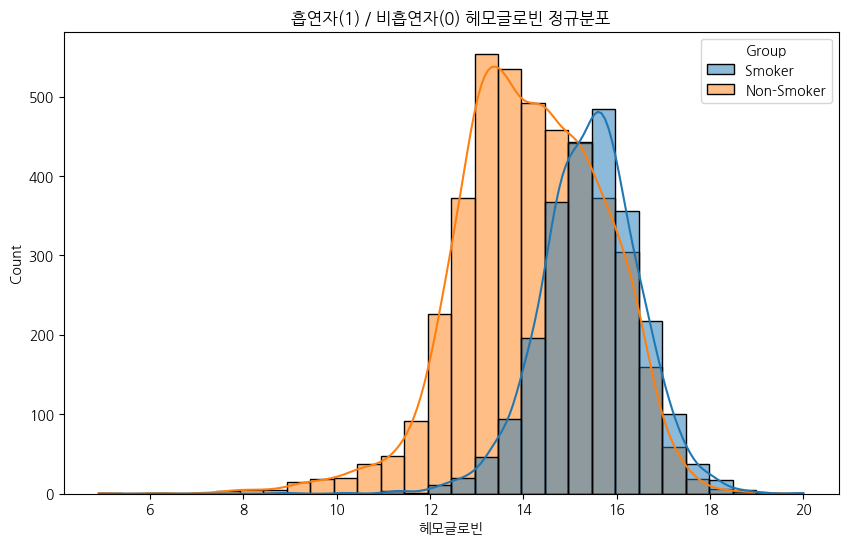

In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 헤모글로빈

df = pd.read_csv("/content/smoking_health_data_isoforest_cleaned_MI.csv")


smoker_col = "label"

df[smoker_col] = df[smoker_col].astype(int)
df["Group"] = df[smoker_col].apply(lambda x: "Smoker" if x == 1 else "Non-Smoker")

target = "헤모글로빈"

plt.figure(figsize=(10,6))
sns.histplot(data=df, x=target, hue="Group", kde=True, bins=30)
plt.title("흡연자(1) / 비흡연자(0) 헤모글로빈 정규분포")
plt.xlabel("헤모글로빈")
plt.ylabel("Count")
plt.savefig('sample_plot17.png')
plt.show()


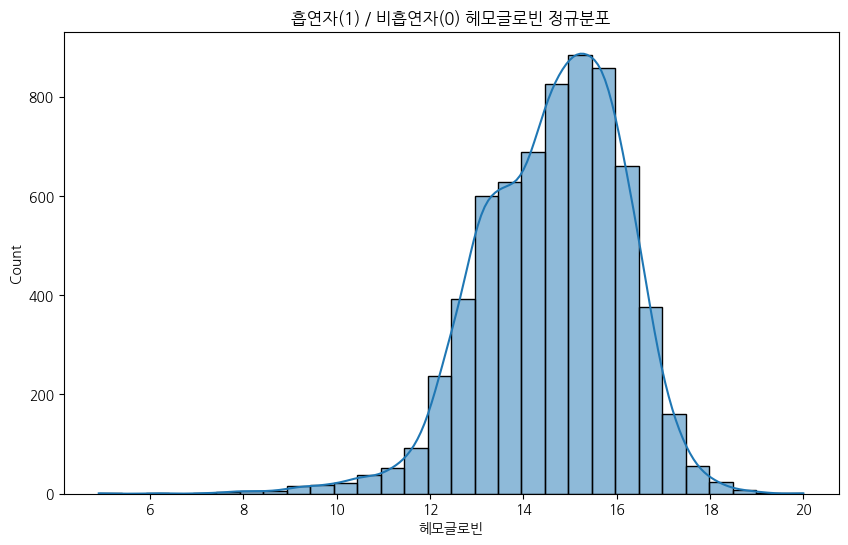

In [36]:

target = "헤모글로빈"

plt.figure(figsize=(10,6))
sns.histplot(data=df, x=target, kde=True, bins=30)
plt.title("흡연자(1) / 비흡연자(0) 헤모글로빈 정규분포")
plt.xlabel("헤모글로빈")
plt.ylabel("Count")
plt.savefig('sample_plot16.png')
plt.show()


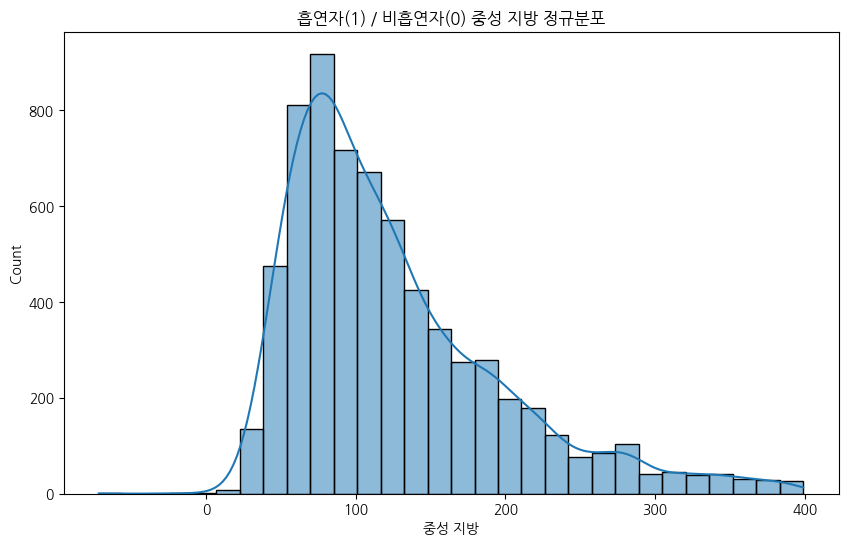

In [35]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 중성지방

target = "중성 지방"

plt.figure(figsize=(10,6))
sns.histplot(data=df, x=target, kde=True, bins=30)
plt.title("흡연자(1) / 비흡연자(0) 중성 지방 정규분포")
plt.xlabel("중성 지방")
plt.ylabel("Count")
plt.savefig('sample_plot15.png')
plt.show()

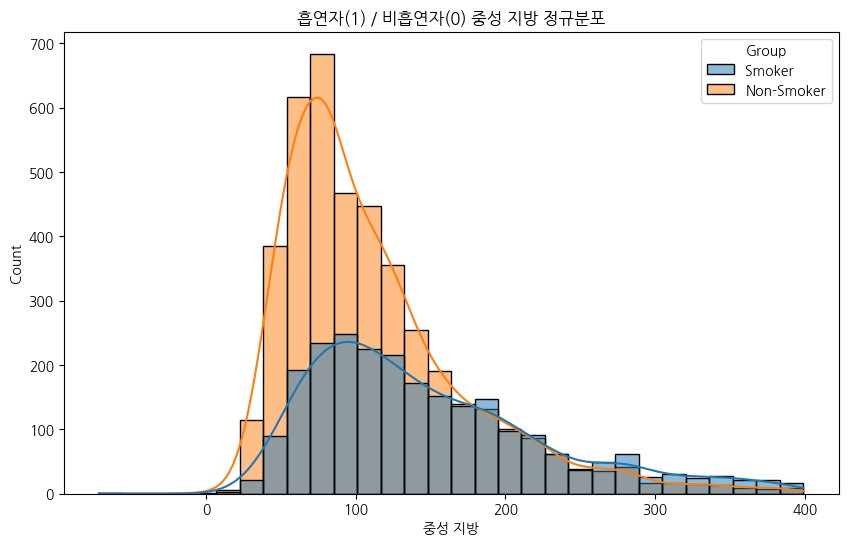

In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 중성지방
smoker_col = "label"

df[smoker_col] = df[smoker_col].astype(int)
df["Group"] = df[smoker_col].apply(lambda x: "Smoker" if x == 1 else "Non-Smoker")
target = "중성 지방"

plt.figure(figsize=(10,6))
sns.histplot(data=df, x=target, hue="Group", kde=True, bins=30)
plt.title("흡연자(1) / 비흡연자(0) 중성 지방 정규분포")
plt.xlabel("중성 지방")
plt.ylabel("Count")
plt.savefig('sample_plot14.png')
plt.show()

In [ ]:
### 단변량 분석에서 파악한 내용을 정리해보세요.
'''
헤모글로빈 :
대부분의 Hb 값이 13~16 g/dL 구간에 모여 있어 전반적으로 정상적인 혈색소 수치를 유지하는 양호한 혈액 건강 상태를 보인다.
10 g/dL 이하의 빈혈 가능 지점이나 위쪽의 높은 Hb(과다혈색소) 지점은 매우 소수에 불과해 이상 사례는 거의 없는 집단임을 보여준다.


헤모글로빈 값은 약 14–15 g/dL 부근에 가장 많이 분포하여 전체적으로 정상 범위의 중심을 이루고 있으며, 분포 형태도 좌우 대칭적이고 정규곡선과 잘 일치해 정규분포 특성을 뚜렷하게 보여준다.
또한 극단적인 이상치가 거의 없어 임상적으로 주의가 필요한 상태가 매우 드물다는 점을 확인할 수 있다.
그래프에서 헤모글로빈 값이 주로 13~16 g/dL에 집중되어 있어 대부분의 사람들이 정상적인 혈색소 농도를 유지하는 건강한 집단임을 보여준다.
반면 10 g/dL 이하의 빈혈 범위나 17 g/dL 이상의 과다혈색소 범위에 해당하는 경우는 매우 적어 임상적으로 문제가 될 가능성은 낮음을 확인할 수 있다.


중성 지방 :
중성지방 수치는 70~150 mg/dL 구간에 가장 많이 몰려 있어 이 범위가 일반적인 수준임을 보여준다.
중성지방 값은 대체로 100~150 mg/dL 부근에 가장 많이 모여 있어 분포의 중심을 이루며, 오른쪽으로 값이 조금 더 길게 퍼져 있어 중성지방이 높은 사람이 다소 존재한다는 점을 대략적으로 보여준다.
중성지방 수치는 70~150 mg/dL 구간에 가장 많이 몰려 있어 이 범위가 일반적인 수준임을 보여준다. 값이 오른쪽으로 길게 퍼져 있어 중성지방이 높은 사람이 일부 존재한다는 점을 자연스럽게 확인할 수 있다.

'''

## 3. 이변량 분석
	이변량 분석 의미 찾기:

    •	변수 간 원인–결과 관계 탐색

    •	어떤 요인이 가장 큰 영향을 주는지 도출

    •	향후 예측 모델 설계 시 주요 Feature 후보 선별

- 가설검정시 다음의 항목을 참조하여 수행합니다.
  - 유의수준 : 5%
  - 숫자 --> 숫자 : 상관분석
  - 범주 --> 범주 : 카이제곱검정
  - 범주 --> 숫자 : t검정, 분산분석
  - 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

/tmp/ipython-input-3023524434.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-3023524434.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-3023524434.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-3023524434.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


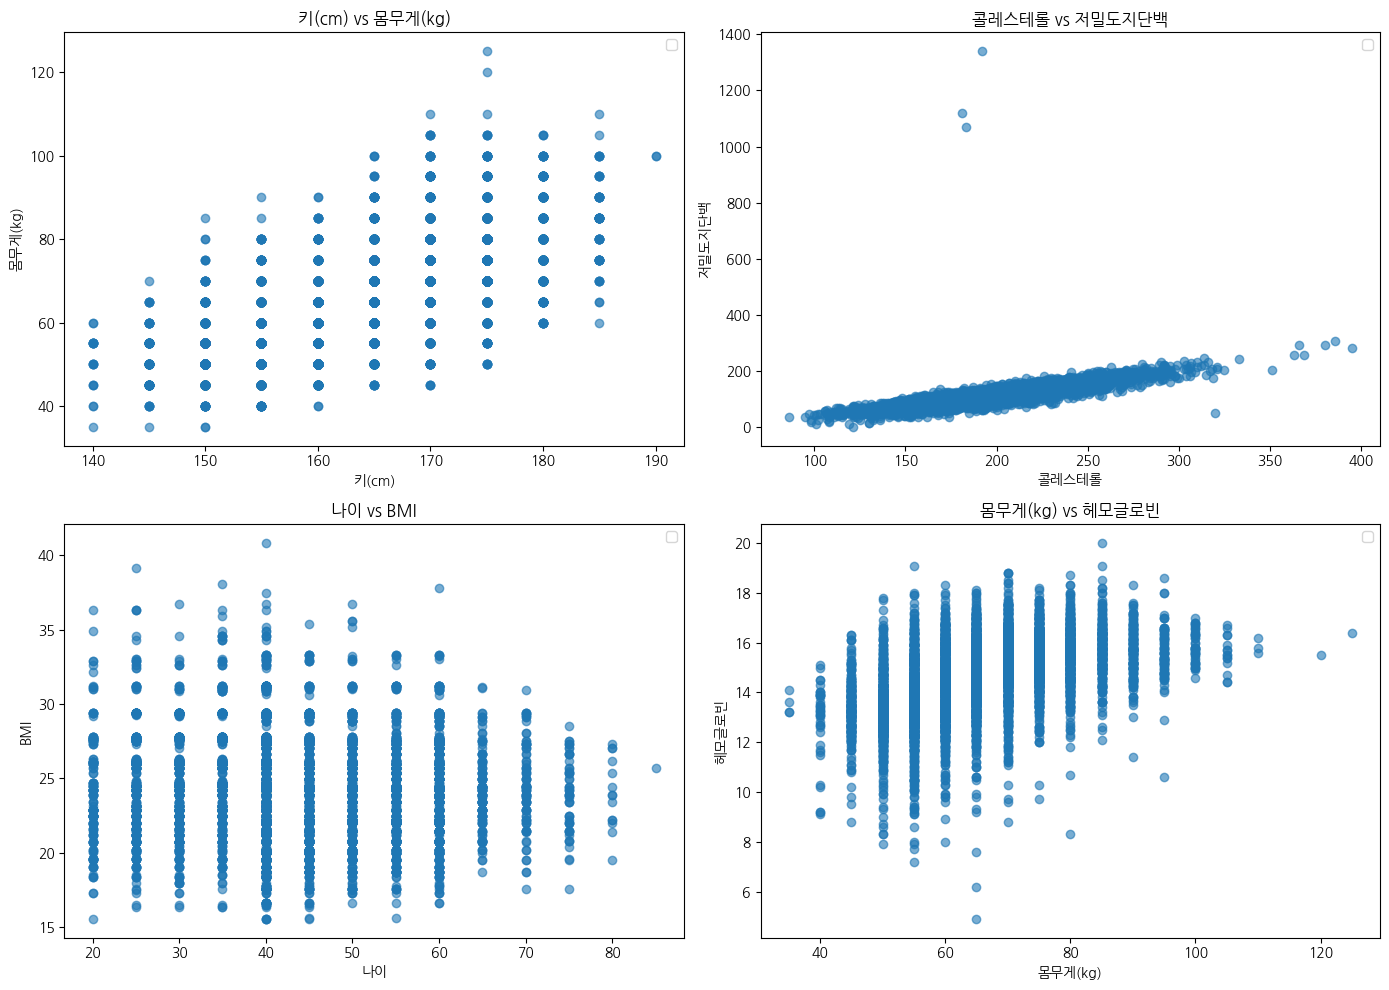

In [29]:
plt.figure(figsize=(14,10))

# 키 - 몸무게(다른 주요 변수에 영향을 줌)
plt.subplot(2,2,1)
plt.scatter(df2['키(cm)'], df2['몸무게(kg)'], alpha=0.6)
plt.xlabel('키(cm)')
plt.ylabel('몸무게(kg)')
plt.title('키(cm) vs 몸무게(kg)')
plt.legend()

# 콜레스테롤 - 저밀도단백질
plt.subplot(2,2,2)
plt.scatter(df2['콜레스테롤'], df2['저밀도지단백'], alpha=0.6)
plt.xlabel('콜레스테롤')
plt.ylabel('저밀도지단백')
plt.title('콜레스테롤 vs 저밀도지단백')
plt.legend()

# 나이 - BMI
plt.subplot(2,2,3)
plt.scatter(df2['나이'], df2['BMI'], alpha=0.6)
plt.xlabel('나이')
plt.ylabel('BMI')
plt.title('나이 vs BMI')
plt.legend()

# label  - 헤모글로빈
plt.subplot(2,2,4)
plt.scatter(df2['몸무게(kg)'], df2['헤모글로빈'], alpha=0.6)
plt.xlabel('몸무게(kg)')
plt.ylabel('헤모글로빈')
plt.title('몸무게(kg) vs 헤모글로빈')
plt.legend()

plt.tight_layout()
plt.show()


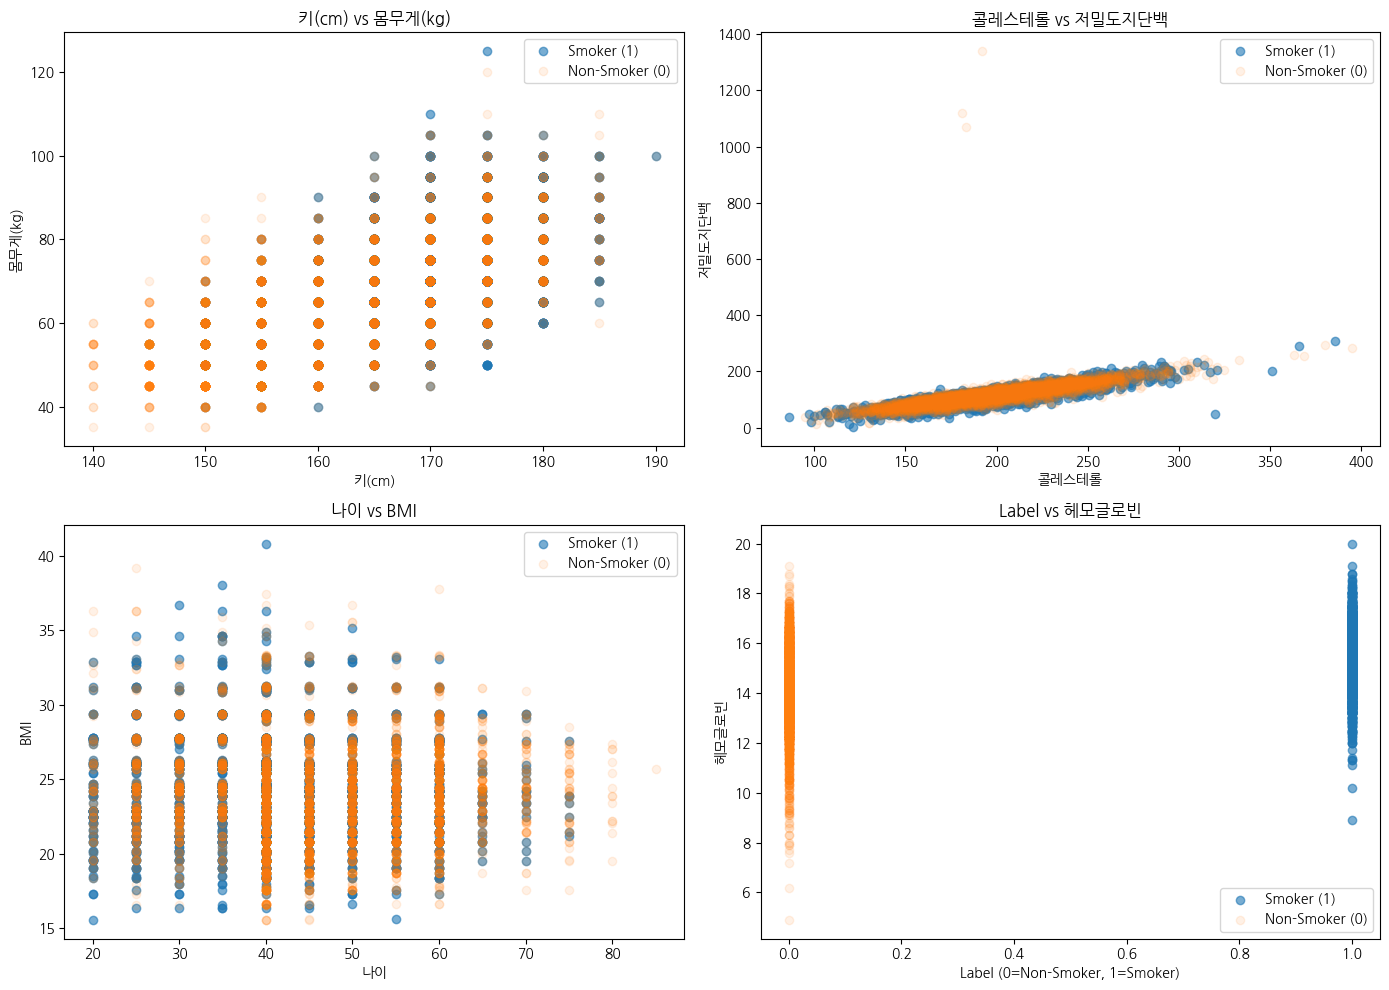

In [33]:
### 이변량 분석에서 파악한 내용을 정리해보세요.
#
df2 = pd.read_csv("/content/smoking_health_data_isoforest_cleaned_MI.csv")
smoker = df2[df2['label'] == 1]
nonsmoker = df2[df2['label'] == 0]

plt.figure(figsize=(14,10))


# 1) 키 - 몸무게
plt.subplot(2,2,1)
plt.scatter(smoker['키(cm)'], smoker['몸무게(kg)'], alpha=0.6, label='Smoker (1)')
plt.scatter(nonsmoker['키(cm)'], nonsmoker['몸무게(kg)'], alpha=0.1, label='Non-Smoker (0)')
plt.xlabel('키(cm)')
plt.ylabel('몸무게(kg)')
plt.title('키(cm) vs 몸무게(kg)')
plt.legend()


# 2) 총콜레스테롤 - LDL 콜레스테롤
plt.subplot(2,2,2)
plt.scatter(smoker['콜레스테롤'], smoker['저밀도지단백'], alpha=0.6, label='Smoker (1)')
plt.scatter(nonsmoker['콜레스테롤'], nonsmoker['저밀도지단백'], alpha=0.1, label='Non-Smoker (0)')
plt.xlabel('콜레스테롤')
plt.ylabel('저밀도지단백')
plt.title('콜레스테롤 vs 저밀도지단백')
plt.legend()


# 3) 나이 - BMI
plt.subplot(2,2,3)
plt.scatter(smoker['나이'], smoker['BMI'], alpha=0.6, label='Smoker (1)')
plt.scatter(nonsmoker['나이'], nonsmoker['BMI'], alpha=0.1, label='Non-Smoker (0)')
plt.xlabel('나이')
plt.ylabel('BMI')
plt.title('나이 vs BMI')
plt.legend()


# 4) Label - Hemoglobin
plt.subplot(2,2,4)
plt.scatter(smoker['label'], smoker['헤모글로빈'], alpha=0.6, label='Smoker (1)')
plt.scatter(nonsmoker['label'], nonsmoker['헤모글로빈'], alpha=0.1, label='Non-Smoker (0)')
plt.xlabel('Label (0=Non-Smoker, 1=Smoker)')
plt.ylabel('헤모글로빈')
plt.title('Label vs 헤모글로빈')
plt.legend()

plt.tight_layout()
plt.savefig('sample_plot20.png')
plt.show()


흡연자와 비흡연자의 신체지표를 비교한 결과, 흡연자 집단은 키와 몸무게 모두에서 비흡연자보다 더 높은 값을 나타내며, 중앙값과 사분위수 범위가 전체적으로 위쪽으로 이동해 있다. 이는 흡연자들이 평균적으로 더 큰 신체 조건을 가진 경향이 있음을 시사하며, 두 집단 간 체격 차이가 단순한 우연이 아니라 분포상 뚜렷하게 확인되는 특징임을 보여준다.

콜레스테롤과 LDL은 강한 양의 상관관계를 보이지만, 산점도 패턴상 흡연 여부에 따른 분포 차이는 크지 않아, 흡연이 LDL–콜레스테롤 구조에 명확한 집단적 변화를 만들지는 않는 것으로 해석할 수 있다.

나이와 BMI는 흡연 여부에 따라 분포 자체는 크게 다르지 않으며, 두 변수만으로 흡연 여부를 명확하게 구분하기는 어렵다

추가적으로 각 건강 지표 간의 관계도 이해해봅시다!
예를 들어, BMI, 혈압, 혈당, 콜레스테롤 등의 수치형 변수들은 서로 영향을 주고받을 수 있으며, 이를 통해 건강 상태를 종합적으로 이해하거나, 향후 모델 설계 및 연구 방향을 제안할 수 있습니다.
추가적인 인사이트를 얻어볼까요 ?

### 상관계수를 구하고 HeatMap으로 시각화 후 분석을 해보세요.
- Heatmap: 변수 간의 상관관계(Correlation)를 색상으로 쉽게 확인할 수 있는 시각화 방법입니다.
- 해석 기준:
  - 값이 1에 가까울수록 → 강한 양의 상관관계
  - 값이 -1에 가까울수록 → 강한 음의 상관관계
  - 값이 0에 가까울수록 → 관계가 약함

이를 통해 변수 간 관계를 한눈에 비교하고, 분석에 필요한 주요 변수를 파악할 수 있습니다.

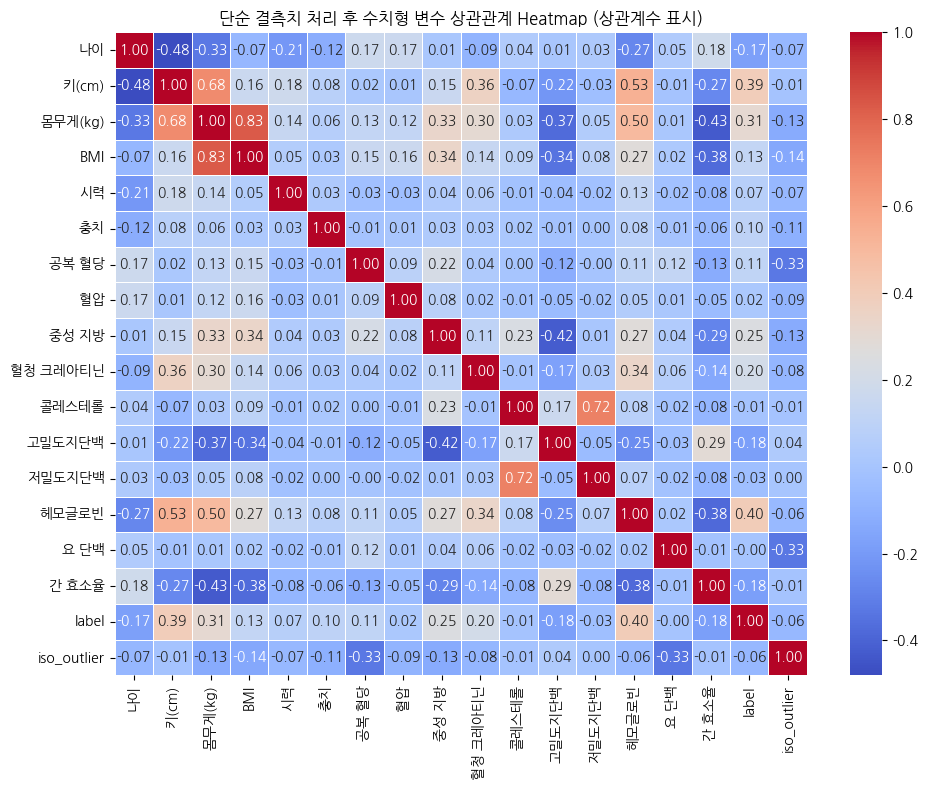

In [32]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
numeric_df = health_data.select_dtypes(include="number")

# 2) 단순 결측치 제거 또는 대체
#    (사용자 상황에 맞춰 mean/median/제거 선택 가능)
#    여기서는 단순히 dropna() 예시 사용
numeric_df_simple = numeric_df.dropna()

# 3) 상관계수 계산
corr = numeric_df_simple.corr()

# 4) 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            annot=True,        # ★ 숫자 표시
            fmt=".2f",         # 소수 둘째 자리
            cmap="coolwarm",   # 색 테마
            linewidths=.5)     # 셀 구분선
plt.title("단순 결측치 처리 후 수치형 변수 상관관계 Heatmap (상관계수 표시)")
plt.tight_layout()
plt.savefig('sample_plot10.png')
plt.show()


## 5. 관계 정리
- 강한 관계의 변수
- 약한 관계의 변수

In [ ]:
### 강한 관계를 보이는 변수에는 어떤 것이 있나요 ?(1, -1)
'''
키  - 몸무게
bmi - 몸무게
키- 헤모글로빈
몸무게 - 헤모글로빈
콜레스테롤 - 저밀도지단백
중성지방 - 고밀도지단백
Lable - 헤모글로빈
'''

In [ ]:
### 약한 관계를 보이는 변수에는 어떤 것이 있나요 ?(0이랑 가까운건 상관계수)
'''
충치 - 공복혈당
충치 - 저밀도지단백
저밀도지단백 - 공복혈당
요단백 - Lable
나이 - bmi
시력 - 콜레스테롤
콜레스테롤 - Lable
'''

## 5. 결론 도출
어떤 요인이 흡연 여부와 관련성이 높은지 인사이트 제시

예시)
- 흡연자는 비흡연자에 비해 평균 혈압과 중성지방 수치가 유의하게 높았습니다.(p<0.05)
- 반면, BMI는 유의한 차이가 없었습니다. (p>0.05)
- 따라서 흡연은 대사 관련 지표(혈압, 중성지방)에 더 큰 영향을 미치는 것으로 해석할 수 있습니다.

In [ ]:
### 어떤 요인이 흡연 여부와 관련성이 높을까요 ? 그 이유는?
'''
데이터가 양이 적고 생각 보다 많은 결측치와 이상치가 존재 했다. 그래서 결과의 값이 조금 이상하게 나온것 같다.

1) 헤모글로빈(Hb) — 양의 상관**

- 흡연자는 일산화탄소(CO) 노출로 인해 산소 운반능력이 감소함

    → 이를 보상하기 위해 **헤모글로빈 수치가 상승**하는 것이 일반적

- 의학적으로 잘 알려진 “흡연성 적혈구 증가증”과 일치

2) 중성지방(TG) — 양의 상관**

- 흡연은 **인슐린 저항성 증가**, **지방 대사 장애**를 유발

    → TG 상승 경향

- 실제 대사증후군 연구에서도 동일한 패턴이 반복적으로 보고됨

==============================================================================================================================================================================================
Height, Weight, BMI 등 체형 지표

- 흡연이 직접 영향을 주지 않음
- 데이터 내 **성별·연령 구성 차이로 인해 일부 허위 상관이 발생했을 가능성 높음

LDL, HDL, 혈압, 혈당(FPG)

- 흡연이 장기적으로 대사 건강에 영향을 줄 수는 있으나

    → 단순 상관계수에서는 약하거나 불일치


시력, 충치, 요단백(PRO) 등

- 흡연과 직접적 생리적 연결이 거의 없어 상관이 낮게 나타나는 것이 정상

'''
